https://machinelearningmastery.ru/monte-carlo-simulations-with-python-part-1-f5627b7d60b0/

In [1]:
import numpy as np
import math
import random
from matplotlib import pyplot as plt 
from IPython.display import clear_output
PI = 3.1415926
e = 2.71828

In [2]:
def get_rand_number(min_value, max_value):
    """
    This function gets a random number from a uniform distribution between
    the two input values [min_value, max_value] inclusively
    Args:
    - min_value (float)
    - max_value (float)
    Return:
    - Random number between this range (float)
    """
    range = max_value - min_value
    choice = random.uniform(0,1)
    return min_value + range*choice

In [ ]:
min_value + range*np.random.uniform(0,1)

In [120]:
get_rand_number(0,5)

0.2993956596141273

Численно вычислить интеграл $$ \int_0^5 \frac{e^{(-x)}}{1+(x-1)^2} dx$$

In [3]:
def f_of_x(x): # задаём подыинтегральную функцию
    """
    This is the main function we want to integrate over.
    Args:
    - x (float) : input to function; must be in radians
    Return:
    - output of function f(x) (float)
    """
    return (e**(-1*x))/(1+(x-1)**2)

Численно вычислить интеграл $$ \int_0^5 \sqrt{x+\sqrt{x}} dx$$

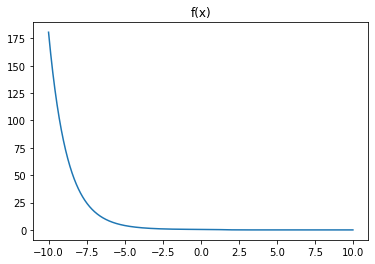

In [6]:
xs = [float(i/50) for i in range(-500,500)]
ys = [f_of_x(x) for x in xs]
plt.plot(xs,ys)
plt.title("f(x)");

In [97]:
# определяем подинтегральную функцию
def f_of_x(x):
    return (x+x**0.5)**0.5

In [4]:
def crude_monte_carlo(num_samples=500000,lower_bound = 0,upper_bound = 5):
    """
    This function performs the Crude Monte Carlo for our
    specific function f(x) on the range x=0 to x=5.
    Notice that this bound is sufficient because f(x)
    approaches 0 at around PI.
    Args:
    - num_samples (float) : number of samples
    Return:
    - Crude Monte Carlo estimation (float)
    
    """
    #lower_bound = 0 # нижний предел
    #upper_bound = 5 # верхний предел
    
    sum_of_samples = 0
    for i in range(num_samples):
        x = get_rand_number(lower_bound, upper_bound) # генерим случайное число в пределах интегрирования
        sum_of_samples += f_of_x(x)
    
    return (upper_bound - lower_bound) * float(sum_of_samples/num_samples)

In [5]:
print(crude_monte_carlo())

0.696447515365912


Численно вычислить интеграл вероятности Муавра-Лапласа
$$\frac{1}{2\pi} \int_{-\infty}^x e^{-z^2 /2} dz \approx \frac{1}{2\pi} \int_{-100}^x e^{-z^2 /2} dz$$

In [17]:
# определяем подинтегральную функцию интеграла 
# вероятности Муавра-Лапласа 
def f_of_x(x):
    return 1/(2*PI)*e**(-0.5*x**2)

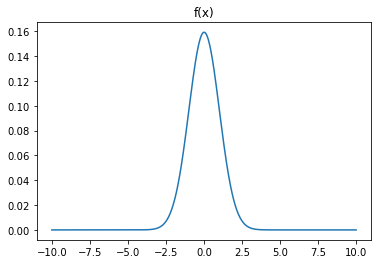

In [24]:
xs = [float(i/50) for i in range(-500,500)]
ys = [f_of_x(x) for x in xs]
plt.plot(xs,ys)
plt.title("f(x)");

In [2]:
def integr_Muavr_Laplas(x,num_samples=100000,lower_bound = -10):
    sum_of_samples = 0
    for i in range(num_samples):
        y = np.random.uniform(lower_bound, x) # генерим случайное число в пределах интегрирования
        sum_of_samples += 1/(2*PI)*e**(-0.5*y**2)
    
    return (x - lower_bound) * float(sum_of_samples/num_samples)
    

In [ ]:
np.random.uniform(0,1)

In [56]:
integr_Muavr_Laplas(3)

0.39736591683323813

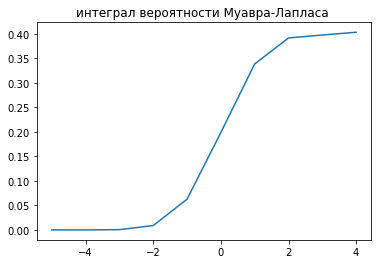

In [52]:
xs = [i for i in range(-5,5)]
ys = [integr_Muavr_Laplas(x) for x in xs]
plt.plot(xs,ys)
plt.title("интеграл вероятности Муавра-Лапласа ");

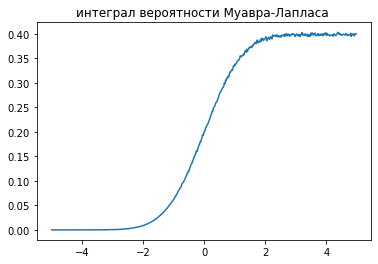

In [3]:
xs = [float(i/50) for i in range(-250,250)]
ys = [integr_Muavr_Laplas(x) for x in xs]
plt.plot(xs,ys)
plt.title("интеграл вероятности Муавра-Лапласа ");

## Определим точность нашей оценки

Насколько мы уверены в нашем ответе? Откуда мы знаем, что 10000 итераций  достаточно, чтобы получить хорошее приближение. Мы можем измерить нашу точность, найдя дисперсию наших оценок. Дисперсия определяется как «Среднее квадрата расстояний от среднего». Можно показать равным этому уравнению:
$$σ^2 = [\frac{b-a}{N}\sum_{i=1}^{N}f^2(x_i)] - [\sum_{i=1}^{N}\frac{b-a}{N}f(x_i)]^2$$
поскольку если $X$ - случайная величина, распределенная равномерно на отрезке $[b,a]$. А $f$ - некоторая функция, то $f(X)$ - элементарная случайная функция и её дисперсия равна $$ D(f) = M(f^2(X)) - M^2(f(X)) = [\sum_{i=1}^{N}f^2(x_i)\cdot p_i] - [\sum_{i=1}^{N}f(x_i)\cdot p_i]^2$$
Т.к. в нашем случае с.в.$X$ распределена равномерно на отрезке $[a,b]$, то $p_i = \frac{b-a}{N}$ и получаем 
$$σ^2 = D(f) = [\frac{b-a}{N}\sum_{i=1}^{N}f^2(x_i)] - [\sum_{i=1}^{N}\frac{b-a}{N}f(x_i)]^2$$

In [126]:
# НЕВЕРНО и затратно
# def get_crude_MC_variance(num_samples):
#     """
#     This function returns the variance fo the Crude Monte Carlo.
#     Note that the inputed number of samples does not neccissarily
#     need to correspond to number of samples used in the Monte
#     Carlo Simulation.
#     Args:
#     - num_samples (int)
#     Return:
#     - Variance for Crude Monte Carlo approximation of f(x) (float)
#     """
#     int_max = 5 # this is the max of our integration range
    
#     # get the average of squares
#     running_total = 0
#     for i in range(num_samples):
#         x = get_rand_number(0, int_max)
#         running_total += f_of_x(x)**2
#     sum_of_sqs = running_total*int_max / num_samples # [𝑏−𝑎\𝑁∑𝑓^2(𝑥𝑖)]
    
#     # get square of average
#     running_total = 0
#     for i in range(num_samples):
#         x = get_rand_number(0, int_max)
#         running_total += f_of_x(x)
#     sq_ave = (int_max*running_total/num_samples)**2 # [𝑏−𝑎/𝑁*∑𝑓(𝑥𝑖)]2
    
#     return sum_of_sqs - sq_ave

In [7]:
# не работает
# def get_crude_MC_variance_new(num_samples):
#     """
#     This function returns the variance fo the Crude Monte Carlo.
#     Note that the inputed number of samples does not neccissarily
#     need to correspond to number of samples used in the Monte
#     Carlo Simulation.
#     Args:
#     - num_samples (int)
#     Return:
#     - Variance for Crude Monte Carlo approximation of f(x) (float)
#     """
#     int_max = 5 # this is the max of our integration range
    
#     running_total_sq = running_total = 0
    
#     for i in range(num_samples):
#         x = get_rand_number(0, int_max)
#         y = f_of_x(x)
#         running_total_sq += y**2
#         running_total += y
#     # get the average of squares
#     sum_of_sqs = running_total_sq*int_max / num_samples
#     print(sum_of_sqs)
    
#     # get square of average    
#     sq_ave = (int_max*running_total/num_samples)**2
#     print(sq_ave)
#     return sum_of_sqs - sq_ave

In [39]:
# не работает
# def get_crude_MC_variance_numpy(num_samples):
#     """
#     This function returns the variance for the Crude Monte Carlo.
#     Note that the inputed number of samples does not neccissarily
#     need to correspond to number of samples used in the Monte
#     Carlo Simulation.
#     Args:
#     - num_samples (int)
#     Return:
#     - Variance for Crude Monte Carlo approximation of f(x) (float)
#     """
#     int_max = 5 # this is the max of our integration range       
    
#     running_total = np.array([f_of_x(np.random.uniform(0, int_max)) for i in range(num_samples)])
#     print(running_total.var())
#     running_total_mean = running_total.mean()
#     running_total_sq_mean = (running_total**2).mean()
        
#     # get the average of squares
#     sum_of_sqs = running_total_sq_mean*int_max # 
#     print(sum_of_sqs)
    
#     # get square of average    
#     sq_ave = (running_total_mean*int_max)**2
#     print(sq_ave)
#     return sum_of_sqs - sq_ave

In [41]:
def get_crude_MC_variance_numpy(num_samples,lower_bound = 0,upper_bound = 5):
    """
    This function returns the variance for the Crude Monte Carlo.
    Note that the inputed number of samples does not neccissarily
    need to correspond to number of samples used in the Monte
    Carlo Simulation.
    Args:
    - num_samples (int)
    Return:
    - Variance for Crude Monte Carlo approximation of f(x) (float)
    """   
    
    running_total = np.array([f_of_x(np.random.uniform(0, upper_bound)) for i in range(num_samples)])
    
    return running_total.var()

Дисперсия дает нам представление о том, на сколько F(X) варьируется в области Икс. Оно зависит от объема выборки. А далее мы можем вычислить ошибку интегрирования рассчитав стандартную ошибку среднего, взяв квадратный корень из дисперсии, деленную на объем выборки. 

In [42]:
res_10_4 = get_crude_MC_variance_numpy(10000)
res_10_4, np.sqrt(res_10_4/10000)
# (19.961567881788657, 0.04467837047362925)

(0.03308160864560855, 0.0018188350295067596)

In [43]:
res_10_5 = get_crude_MC_variance_numpy(100000)
res_10_5, np.sqrt(res_10_5/100000)
# (19.98456827314877, 0.014136678631541699)

(0.033823158218088095, 0.0005815768067769561)

In [44]:
res_10_6 = get_crude_MC_variance_numpy(1000000)
res_10_6, np.sqrt(res_10_6/1000000)
# (19.95827719434609, 0.00446746876814445)

(0.03397052293880247, 0.0001843109409091128)

In [107]:
def integr_Muavr_Laplas_variance(num_samples):
    """
    This function returns the variance fo the Crude Monte Carlo.
    Note that the inputed number of samples does not neccissarily
    need to correspond to number of samples used in the Monte
    Carlo Simulation.
    Args:
    - num_samples (int)
    Return:
    - Variance for Crude Monte Carlo approximation of f(x) (float)
    """
    int_max = 5 # this is the max of our integration range
    
    running_total_sq = 0
    running_total = 0
    for i in range(num_samples):
        x = get_rand_number(0, int_max)
        y = integr_Muavr_Laplas(x)
        running_total_sq += y**2
        running_total += y
    # get the average of squares
    sum_of_sqs = running_total_sq*int_max / num_samples
    
    # get square of average    
    sq_ave = (int_max*running_total/num_samples)**2
    print(sum_of_sqs)
    print(sq_ave)
    return sum_of_sqs - sq_ave

In [104]:
# integr_Muavr_Laplas_variance(10000)

In [108]:
res_10_4 = integr_Muavr_Laplas_variance(10000)
res_10_4

0.023052127576725867
0.04133806268678585


-0.018285935110059985